In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.paths import DATA_RAW_DIR
from pathlib import Path

In [2]:
path_diabetes = str(DATA_RAW_DIR / "diabetes.csv")
print(Path(path_diabetes).exists())

True


In [3]:
df_diabetes = pd.read_csv(path_diabetes, sep=",", encoding="utf-8")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_diabetes.duplicated().sum()

np.int64(0)

In [7]:
df_diabetes.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
487,0,173,78,32,265,46.5,1.159,58,0
119,4,99,76,15,51,23.2,0.223,21,0
488,4,99,72,17,0,25.6,0.294,28,0
740,11,120,80,37,150,42.3,0.785,48,1
340,1,130,70,13,105,25.9,0.472,22,0
248,9,124,70,33,402,35.4,0.282,34,0
389,3,100,68,23,81,31.6,0.949,28,0
203,2,99,70,16,44,20.4,0.235,27,0
294,0,161,50,0,0,21.9,0.254,65,0
20,3,126,88,41,235,39.3,0.704,27,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [8]:
df_diabetes.shape

(768, 9)

In [9]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Random forest training

In [10]:
# split data into features and target
X = df_diabetes.drop(columns=["Outcome"], axis=1)
y = df_diabetes["Outcome"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=00000)



In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10, random_state=00000)

In [13]:
# Train
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [14]:
# predictions
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

# Evaluation

In [15]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Train accuracy: 0.98
Test accuracy: 0.77


In [16]:
# Feature importance
feature_importances = model_rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
1,Glucose,0.252983
7,Age,0.172710
5,BMI,0.157963
6,DiabetesPedigreeFunction,0.118139
3,SkinThickness,0.086799
2,BloodPressure,0.074944
4,Insulin,0.073305
0,Pregnancies,0.063155


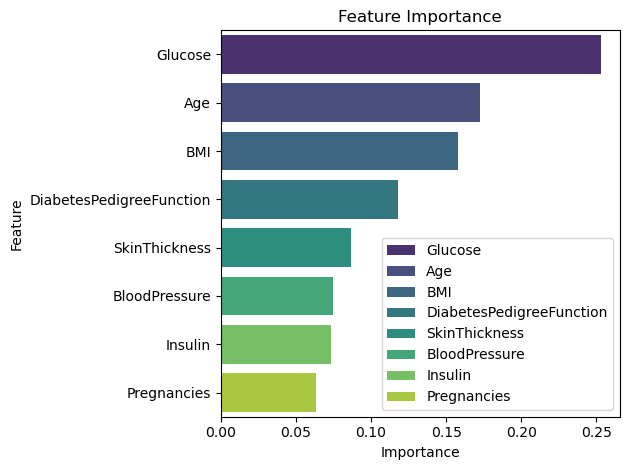

In [24]:
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis', hue='Feature', legend=True)
plt.title("Feature Importance")
plt.legend()
plt.tight_layout()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()